In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# to encode string variables like LANGUAGE
from sklearn.preprocessing import LabelEncoder
# to determine importance of facts on RANK
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

**Import the libraries**

In [ ]:
dataset = pd.read_csv("dataset.csv")
#avg_viewers, avg_followers_gained, and total_time_streamed have 3 digit seperators that need to be removed they should be integers
cols = ['AVG_VIEWERS_PER_STREAM', 'FOLLOWERS_GAINED_PER_STREAM', 'TOTAL_TIME_STREAMED']

for col in cols:
    for i in range(len(dataset[col])):
        # if there is three zeros after the decimal point remove them, if they are not zero remove the decimal point
        if dataset[col][i] % 1 == 0:
            dataset.loc[i, col] = int(dataset[col][i])
        else:
            dataset.loc[i, col] = int(dataset[col][i] * 1000)
    dataset[col] = dataset[col].astype('int64')


df = dataset.copy()

**There was an issue about presentation of numbers in the dataset we use, so we had to change it to use the dataset properly**

In [ ]:
# Function definition to produce a plot
def plot_category(col):
  x = df[col]
  plt.figure(figsize=(10, 5))
  sns.countplot(data=df, y=col, palette="viridis")
  plt.title(f"STREAMER VS {col}")
  plt.xlabel("Number of Streamers")
  plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RANK                            999 non-null    int64  
 1   NAME                            999 non-null    object 
 2   LANGUAGE                        999 non-null    object 
 3   TYPE                            999 non-null    object 
 4   MOST_STREAMED_GAME              999 non-null    object 
 5   SCND_MOST_STREAMED_GAME         922 non-null    object 
 6   AVERAGE_STREAM_DURATION         999 non-null    float64
 7   FOLLOWERS_GAINED_PER_STREAM     999 non-null    int64  
 8   AVG_VIEWERS_PER_STREAM          999 non-null    int64  
 9   AVG_GAMES_PER_STREAM            999 non-null    float64
 10  TOTAL_TIME_STREAMED             999 non-null    int64  
 11  TOTAL_FOLLOWERS                 999 non-null    int64  
 12  TOTAL_VIEWS                     999 

**We can see there are null values in 'SCND_MOST_STREAMED_GAME' column. Need to fill it according to get accurate results**

In [ ]:
df.dtypes

RANK                                int64
NAME                               object
LANGUAGE                           object
TYPE                               object
MOST_STREAMED_GAME                 object
SCND_MOST_STREAMED_GAME            object
AVERAGE_STREAM_DURATION           float64
FOLLOWERS_GAINED_PER_STREAM         int64
AVG_VIEWERS_PER_STREAM              int64
AVG_GAMES_PER_STREAM              float64
TOTAL_TIME_STREAMED                 int64
TOTAL_FOLLOWERS                     int64
TOTAL_VIEWS                         int64
TOTAL_GAMES_STREAMED                int64
ACTIVE_DAYS_PER_WEEK              float64
MOST_ACTIVE_DAY                    object
DAY_WITH_MOST_FOLLOWERS_GAINED     object
dtype: object

In [ ]:
df.shape

(999, 17)

In [ ]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RANK,999.0,NaN,NaN,NaN,500.972973,288.576373,1.0,251.5,501.0,750.5,1000.0
NAME,999,999,kaicenat,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LANGUAGE,999,19,English,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TYPE,999,2,personality,942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MOST_STREAMED_GAME,999,105,Just Chatting,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCND_MOST_STREAMED_GAME,922,178,Just Chatting,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVERAGE_STREAM_DURATION,999.0,NaN,NaN,NaN,5.996697,3.241013,1.2,4.2,5.4,6.9,23.9
FOLLOWERS_GAINED_PER_STREAM,999.0,NaN,NaN,NaN,1086.592593,2003.239936,-1277.0,195.5,452.0,1031.0,18889.0
AVG_VIEWERS_PER_STREAM,999.0,NaN,NaN,NaN,21737.74975,45890.751397,0.0,941.0,6832.0,23478.0,481615.0
AVG_GAMES_PER_STREAM,999.0,NaN,NaN,NaN,1.477878,0.575189,1.0,1.1,1.3,1.7,9.3


In [ ]:
df.isnull().sum()

RANK                               0
NAME                               0
LANGUAGE                           0
TYPE                               0
MOST_STREAMED_GAME                 0
SCND_MOST_STREAMED_GAME           77
AVERAGE_STREAM_DURATION            0
FOLLOWERS_GAINED_PER_STREAM        0
AVG_VIEWERS_PER_STREAM             0
AVG_GAMES_PER_STREAM               0
TOTAL_TIME_STREAMED                0
TOTAL_FOLLOWERS                    0
TOTAL_VIEWS                        0
TOTAL_GAMES_STREAMED               0
ACTIVE_DAYS_PER_WEEK               0
MOST_ACTIVE_DAY                    0
DAY_WITH_MOST_FOLLOWERS_GAINED     0
dtype: int64

In [ ]:
df.fillna("None",inplace=True)
df.isnull().sum()

RANK                              0
NAME                              0
LANGUAGE                          0
TYPE                              0
MOST_STREAMED_GAME                0
SCND_MOST_STREAMED_GAME           0
AVERAGE_STREAM_DURATION           0
FOLLOWERS_GAINED_PER_STREAM       0
AVG_VIEWERS_PER_STREAM            0
AVG_GAMES_PER_STREAM              0
TOTAL_TIME_STREAMED               0
TOTAL_FOLLOWERS                   0
TOTAL_VIEWS                       0
TOTAL_GAMES_STREAMED              0
ACTIVE_DAYS_PER_WEEK              0
MOST_ACTIVE_DAY                   0
DAY_WITH_MOST_FOLLOWERS_GAINED    0
dtype: int64

In [ ]:
df.tail()

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,SCND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
994,996,jlcs2,English,personality,Counter-Strike,Just Chatting,4.0,248,1423,1.3,1873,133000,766000,31,1.8,Monday,Saturday
995,997,nobru_xy,Portuguese,personality,Virtual Casino,None,10.4,874,0,1.0,21,1300,0,1,0.8,Friday,Friday
996,998,buxexa_t,Portuguese,personality,Virtual Casino,Slots,9.6,216,0,1.0,19,1300,0,2,0.4,Thursday,Thursday
997,999,sweetdreams,English,personality,Apex Legends,Z1: Battle Royale,5.1,605,16190,1.1,6827,837000,22400000,24,3.6,Tuesday,Monday
998,1000,giantwaffle,English,personality,Minecraft,Just Chatting,7.9,97,21465,2.7,19426,856000,74500000,782,6.3,Tuesday,Sunday


**We have successfully filled the NaN with None. None represents playing only one game in your streams.**

In [ ]:
df = dataset.copy()

k_df = df.select_dtypes(include=["object"])
k_df.fillna("None",inplace=True)
k_df

,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,SCND_MOST_STREAMED_GAME,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,Friday,Saturday
1,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,Tuesday,Sunday
2,caedrel,English,personality,League of Legends,I'm Only Sleeping,Thursday,Sunday
3,caseoh_,English,personality,NBA 2K23,Just Chatting,Friday,Monday
4,ibai,Spanish,personality,Just Chatting,League of Legends,Wednesday,Saturday
...,...,...,...,...,...,...,...
994,jlcs2,English,personality,Counter-Strike,Just Chatting,Monday,Saturday
995,nobru_xy,Portuguese,personality,Virtual Casino,None,Friday,Friday
996,buxexa_t,Portuguese,personality,Virtual Casino,Slots,Thursday,Thursday
997,sweetdreams,English,personality,Apex Legends,Z1: Battle Royale,Tuesday,Monday


In [ ]:
k_df.LANGUAGE.unique()

array(['English', 'Spanish', 'French', 'German', 'Russian', 'Japanese',
       'Chinese', 'Portuguese', 'Italian', 'Polish', 'Turkish',
       'Ukrainian', 'Korean', 'Thai', 'Hungarian', 'Czech', 'Cantonese',
       'Romanian', 'Arabic'], dtype=object)

In [ ]:
k_df["LANGUAGE"].describe()

count         999
unique         19
top       English
freq          401
Name: LANGUAGE, dtype: object

In [ ]:
k_df["LANGUAGE"].value_counts().count()

19

In [ ]:
k_df["LANGUAGE"].value_counts()

LANGUAGE
English       401
Russian       115
Spanish       106
Portuguese     82
Japanese       79
French         72
German         60
Chinese        28
Polish         18
Italian        13
Turkish         7
Thai            5
Ukrainian       3
Czech           3
Korean          2
Cantonese       2
Hungarian       1
Romanian        1
Arabic          1
Name: count, dtype: int64

C:\Users\Win10\AppData\Local\Temp\ipykernel_9432\2586556940.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette="viridis")


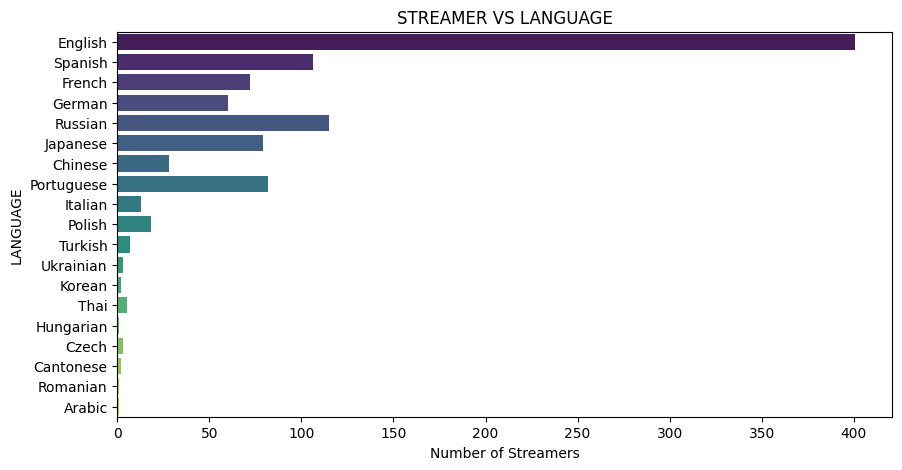

In [ ]:
#k_df["LANGUAGE"].value_counts().plot.barh().set_title("Stream Language Frequencies");
plot_category("LANGUAGE")

**We obtained usefull informations and the graph of LANGUAGE column. We can clearly see that the most used language while streaming is English for top 1000 streamers**

In [ ]:
k_df["MOST_STREAMED_GAME"].value_counts().count()

105

In [ ]:
k_df.MOST_STREAMED_GAME.unique()

array(['Just Chatting', "Tom Clancy's Rainbow Six Siege",
       'League of Legends', 'NBA 2K23', 'Minecraft', 'World of Warcraft',
       'VALORANT', 'Dota 2', 'Grand Theft Auto V', 'Apex Legends',
       'PUBG: BATTLEGROUNDS', 'Overwatch', 'Counter-Strike',
       'Street Fighter 6', 'Sports', 'Brawl Stars', 'Trackmania',
       'Warframe', 'Rocket League', 'Teamfight Tactics',
       'Software and Game Development', 'Valorant', 'Escape from Tarkov',
       'FIFA 21', 'Hearthstone', 'Fortnite', 'EA Sports FC 24',
       'Path of Exile', 'Madden NFL 24', 'Dark Souls', 'FIFA 23',
       'Ashes of Creation', 'Super Auto Pets', 'Variety',
       'Magic: The Gathering', 'GeoGuessr', 'Chess', 'Destiny 2',
       'World of Tanks', 'Special Events', 'Music', 'NBA 2K22',
       'Genshin Impact', 'Call of Duty: Warzone', 'FIFA 19', 'Brawlhalla',
       'Games + Demos', 'Dead by Daylight', 'FINAL FANTASY XIV ONLINE',
       'Talk Shows & Podcasts', 'ELDEN RING', 'Super Mario World',
       'The

In [ ]:
k_df["MOST_STREAMED_GAME"].describe()

count               999
unique              105
top       Just Chatting
freq                257
Name: MOST_STREAMED_GAME, dtype: object

In [ ]:
k_df["MOST_STREAMED_GAME"].value_counts()

MOST_STREAMED_GAME
Just Chatting         257
League of Legends      84
Grand Theft Auto V     74
VALORANT               60
Casino                 36
                     ... 
Ashes of Creation       1
Dungeons & Dragons      1
Dark Souls              1
MORDHAU                 1
Halo Infinite           1
Name: count, Length: 105, dtype: int64

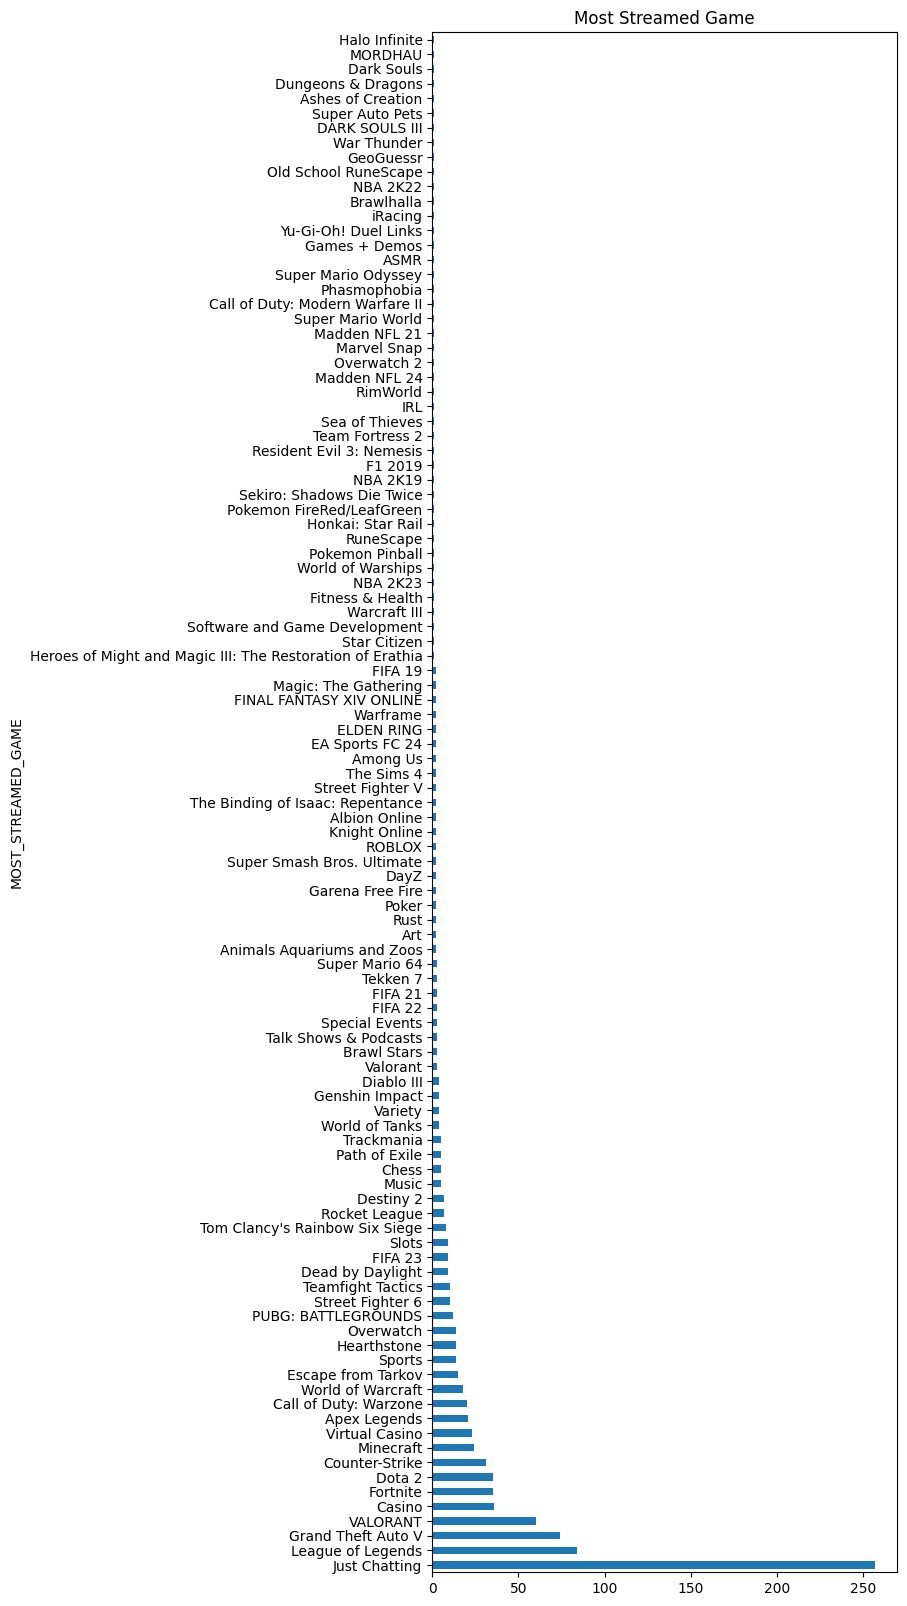

In [ ]:
plt.figure(figsize=(6,20))
k_df["MOST_STREAMED_GAME"].value_counts().plot.barh().set_title("Most Streamed Game");

**We obtained usefull informations and the graph of LANGUAGE column. We can see that the most preferred category is by far just chatting**

In [ ]:
k_df.SCND_MOST_STREAMED_GAME.unique()

array(["I'm Only Sleeping", 'NBA 2K20', 'Just Chatting',
       'League of Legends', 'VALORANT', 'Counter-Strike',
       'League of Legends: Wild Rift', 'Minecraft', 'None',
       'Apex Legends', 'Grand Theft Auto V', 'Fortnite', 'Variety',
       'Among Us', 'Virtual Casino', 'Call of Duty: Warzone',
       'Overwatch 2', 'Slots', "Garry's Mod", 'Escape from Tarkov',
       'PUBG: BATTLEGROUNDS', 'TrackMania 2: Stadium', 'Special Events',
       'Sports', 'Science & Technology', 'World of Warcraft', 'FIFA 23',
       'IRL', 'FIFA 22', 'Dota 2', 'Teamfight Tactics', 'Tabletop RPGs',
       'Monster Hunter: World', 'Clash Royale', 'Music', 'ELDEN RING',
       'Poker', 'EA Sports FC 24', 'Rust', 'Gartic Phone',
       'Talk Shows & Podcasts', 'The Elder Scrolls Online',
       'The Last of Us Part II', 'The Binding of Isaac: Repentance',
       'TrackMania (1)', 'Winning Eleven: Pro Evolution Soccer 2007',
       'Overwatch', 'Call of Duty: Modern Warfare III',
       'Magic: The Gath

In [ ]:
k_df["SCND_MOST_STREAMED_GAME"].describe()

count               999
unique              179
top       Just Chatting
freq                155
Name: SCND_MOST_STREAMED_GAME, dtype: object

In [ ]:
k_df["SCND_MOST_STREAMED_GAME"].value_counts().count()

179

In [ ]:
k_df["SCND_MOST_STREAMED_GAME"].value_counts()

SCND_MOST_STREAMED_GAME
Just Chatting                                         155
None                                                   77
VALORANT                                               51
Minecraft                                              42
Grand Theft Auto V                                     40
                                                     ... 
Heroes of Might and Magic III: The Shadow of Death      1
Lethal Company                                          1
Jackbox Party Packs                                     1
Animal Crossing: New Horizons                           1
Raft                                                    1
Name: count, Length: 179, dtype: int64

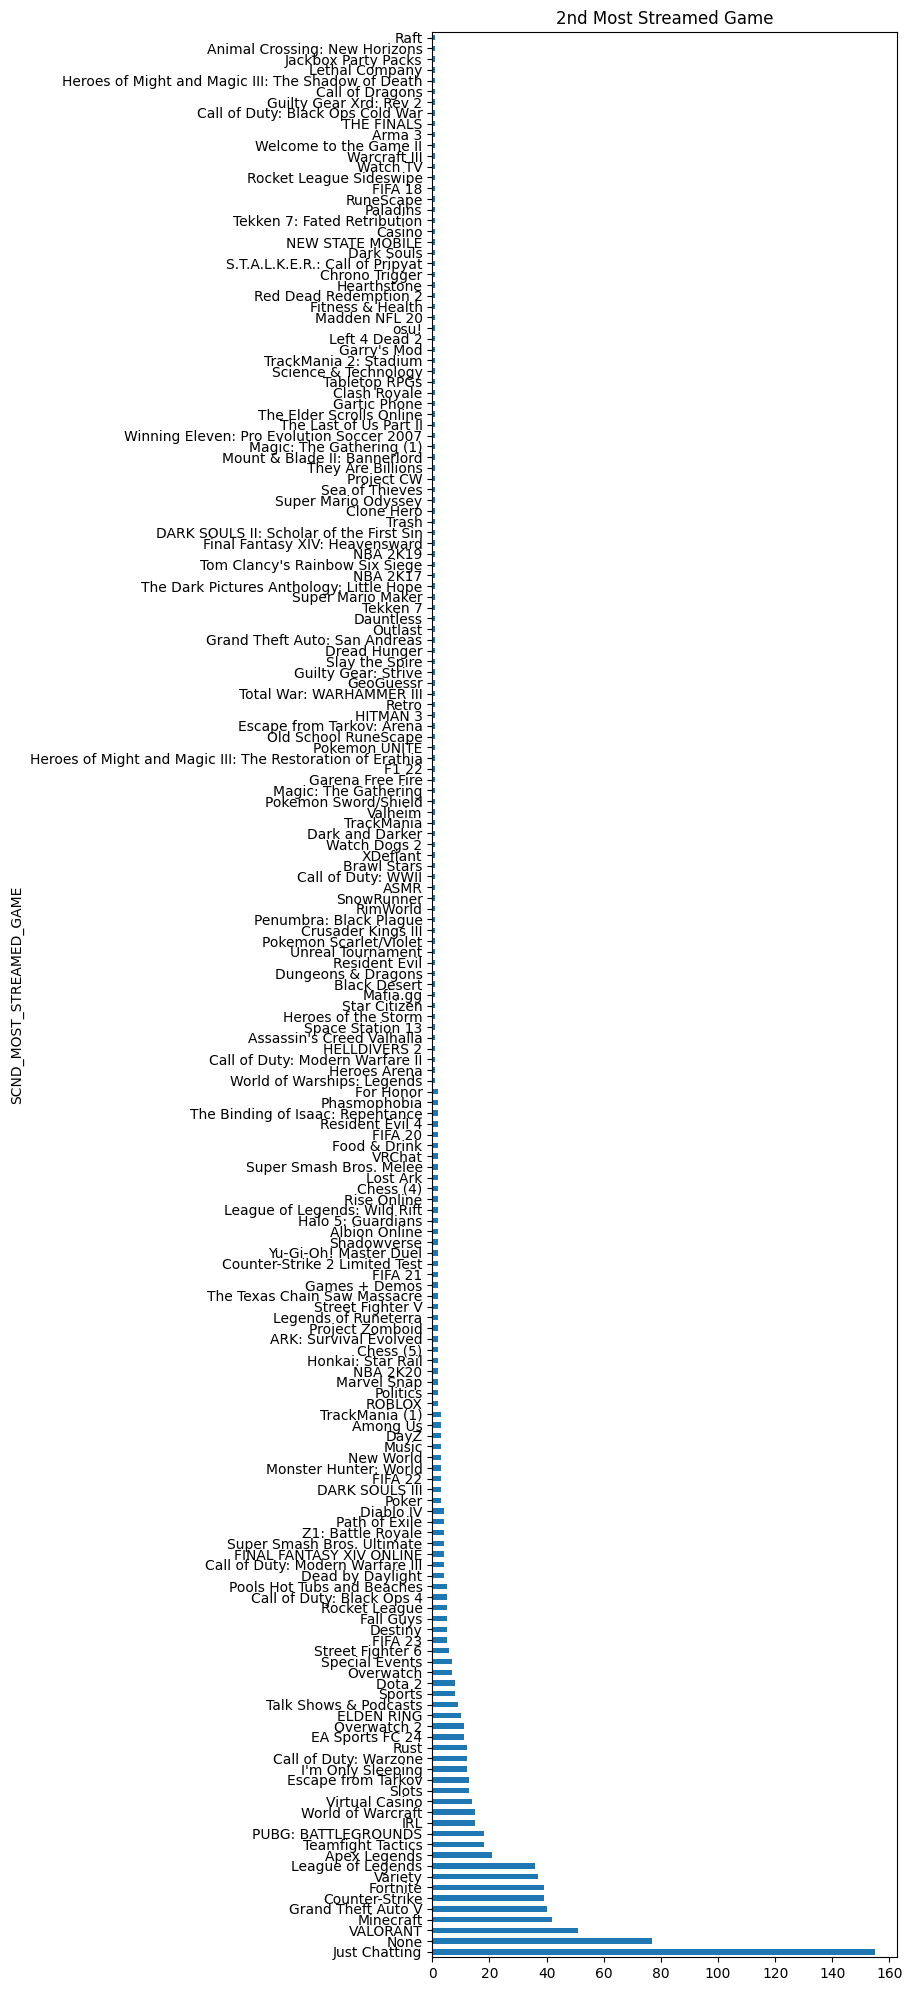

In [ ]:
plt.figure(figsize=(6,25))
k_df["SCND_MOST_STREAMED_GAME"].value_counts().plot.barh().set_title("2nd Most Streamed Game");

As we can see from this graph, None is the most second most streamed game. Which means a lot of the top 1000 streamers stick to only one game.

In [ ]:
k_df.TYPE.unique()

array(['personality', 'esports'], dtype=object)

In [ ]:
k_df["TYPE"].describe()

count             999
unique              2
top       personality
freq              942
Name: TYPE, dtype: object

In [ ]:
k_df["TYPE"].value_counts().count()

2

In [ ]:
k_df["TYPE"].value_counts()

TYPE
personality    942
esports         57
Name: count, dtype: int64

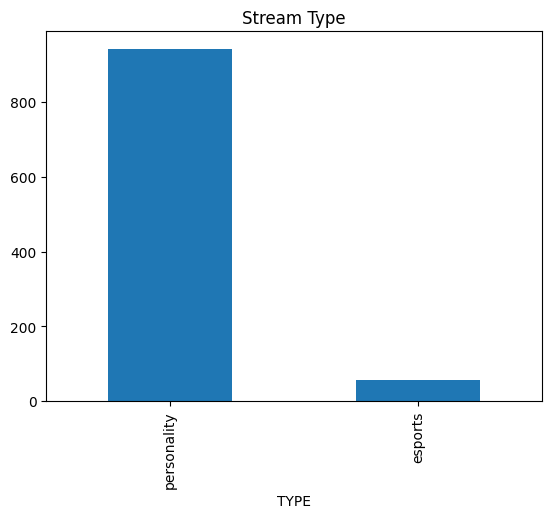

In [ ]:
k_df["TYPE"].value_counts().plot.bar().set_title("Stream Type");

In [ ]:
k_df["MOST_ACTIVE_DAY"].describe()

count         999
unique          7
top       Tuesday
freq          183
Name: MOST_ACTIVE_DAY, dtype: object

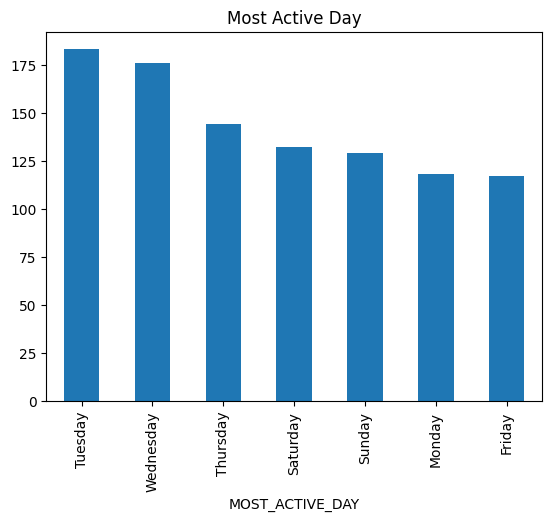

In [ ]:
k_df["MOST_ACTIVE_DAY"].value_counts().plot.bar().set_title("Most Active Day");

**These shows us there is no big differance between most active days of streamers**

In [ ]:
n_df = dataset.copy()

n_df["AVERAGE_STREAM_DURATION"].describe()

count    999.000000
mean       5.996697
std        3.241013
min        1.200000
25%        4.200000
50%        5.400000
75%        6.900000
max       23.900000
Name: AVERAGE_STREAM_DURATION, dtype: float64

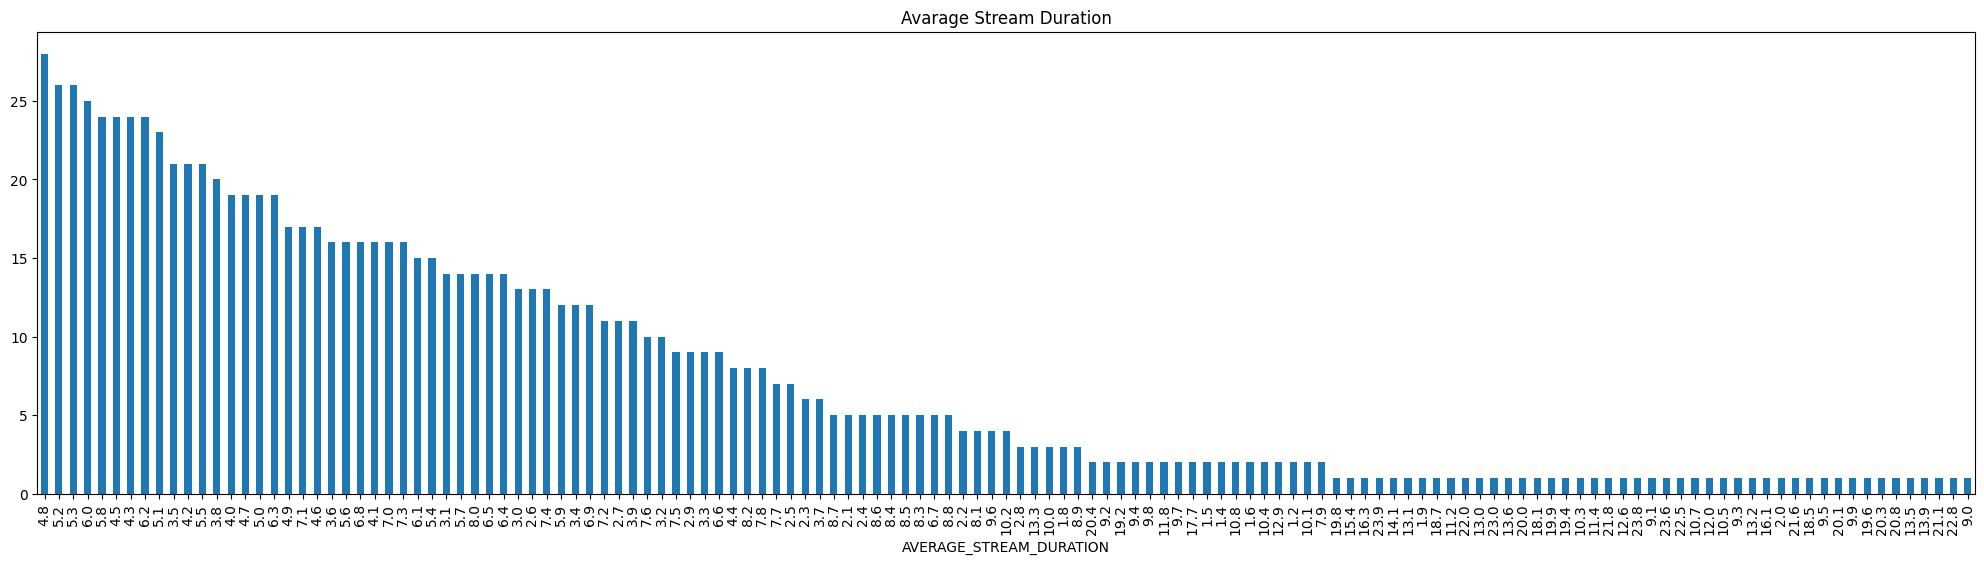

In [ ]:
plt.figure(figsize=(25,6))
n_df["AVERAGE_STREAM_DURATION"].value_counts().plot.bar().set_title("Avarage Stream Duration");

**This graph shows us that most streams last around 5-6 hours**

In [ ]:
n_df["AVG_GAMES_PER_STREAM"].describe()

count    999.000000
mean       1.477878
std        0.575189
min        1.000000
25%        1.100000
50%        1.300000
75%        1.700000
max        9.300000
Name: AVG_GAMES_PER_STREAM, dtype: float64

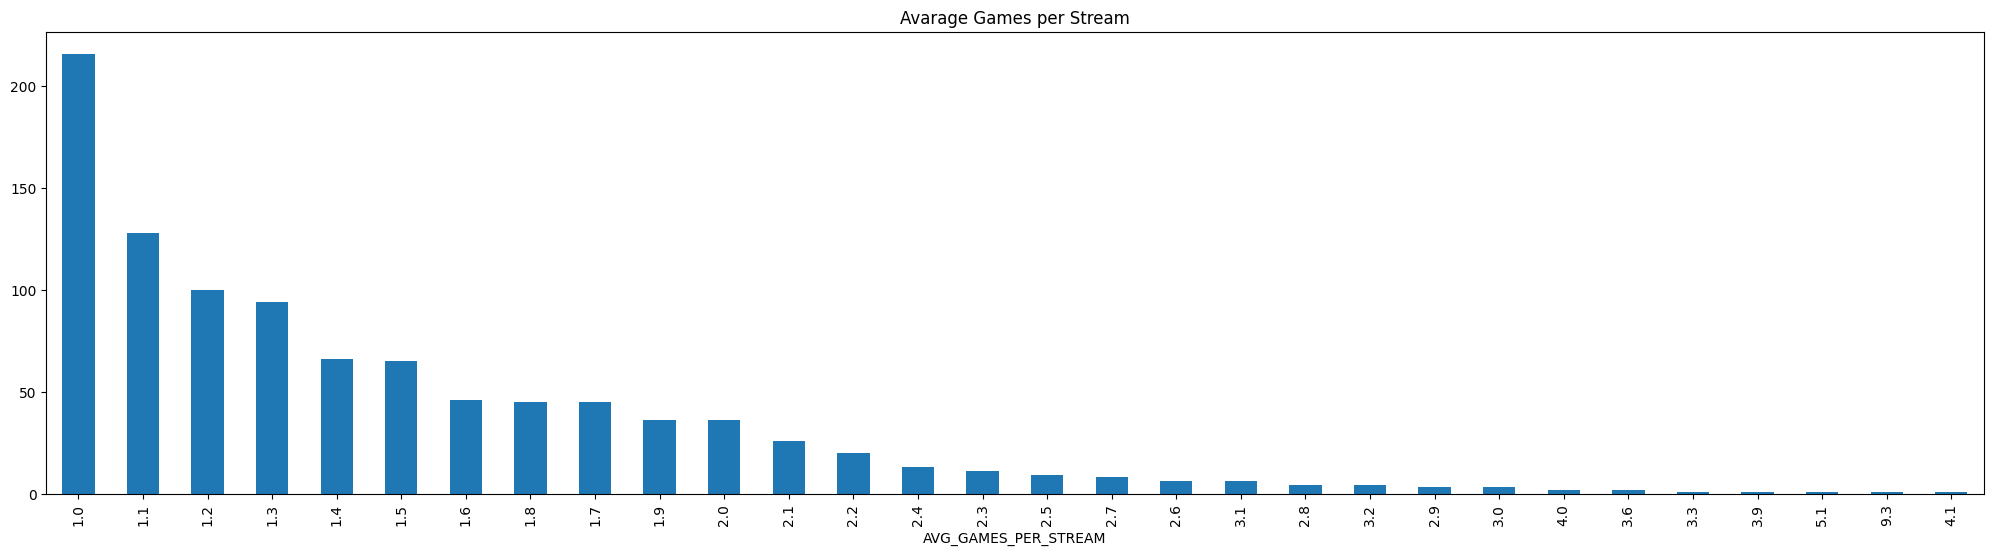

In [ ]:
plt.figure(figsize=(25,6))
n_df["AVG_GAMES_PER_STREAM"].value_counts().plot.bar().set_title("Avarage Games per Stream");

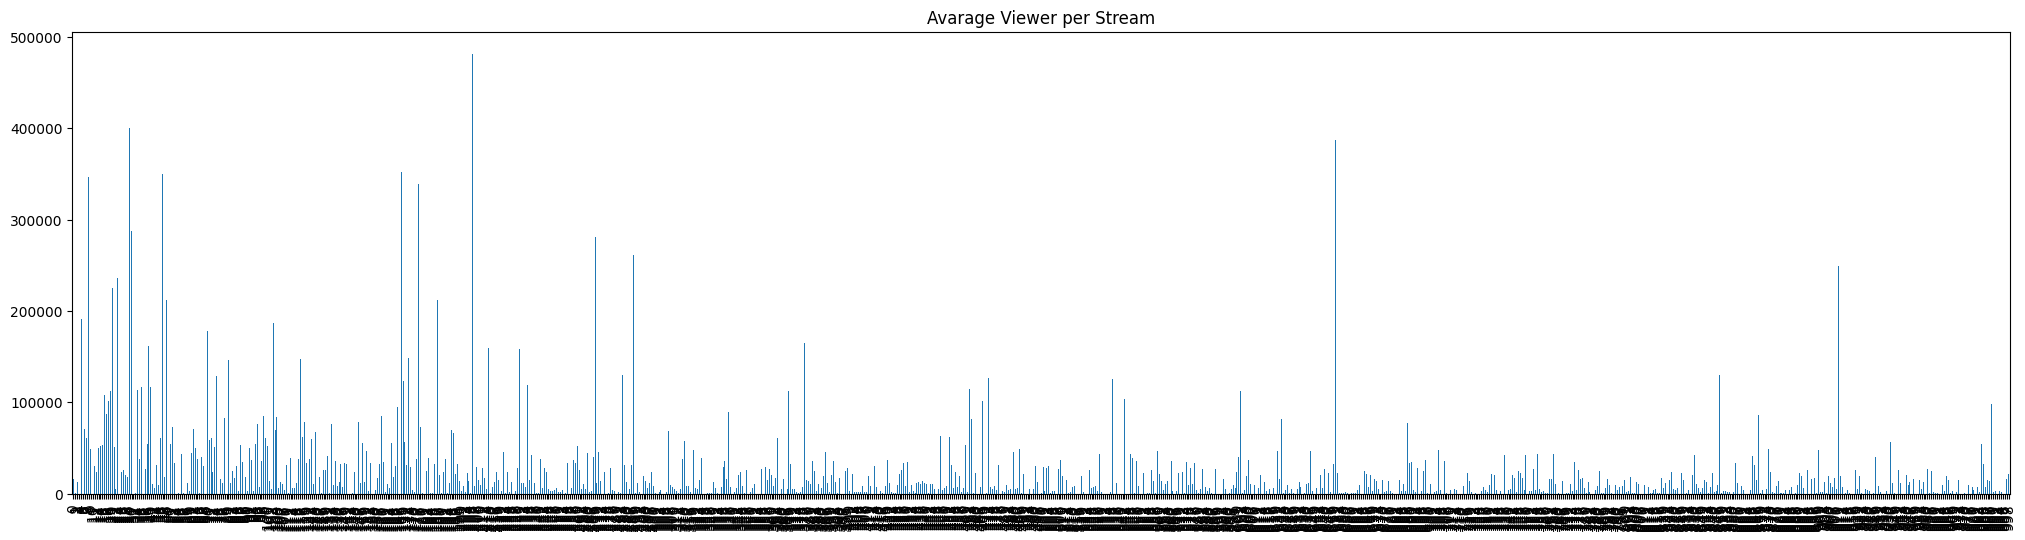

In [ ]:
plt.figure(figsize=(25,6))
n_df["AVG_VIEWERS_PER_STREAM"].plot.bar().set_title("Avarage Viewer per Stream");

In [ ]:
n_df["TOTAL_FOLLOWERS"].describe().astype("int64")

count         999
mean       919403
std       1725450
min             0
25%        187500
50%        437000
75%        889500
max      19000000
Name: TOTAL_FOLLOWERS, dtype: int64

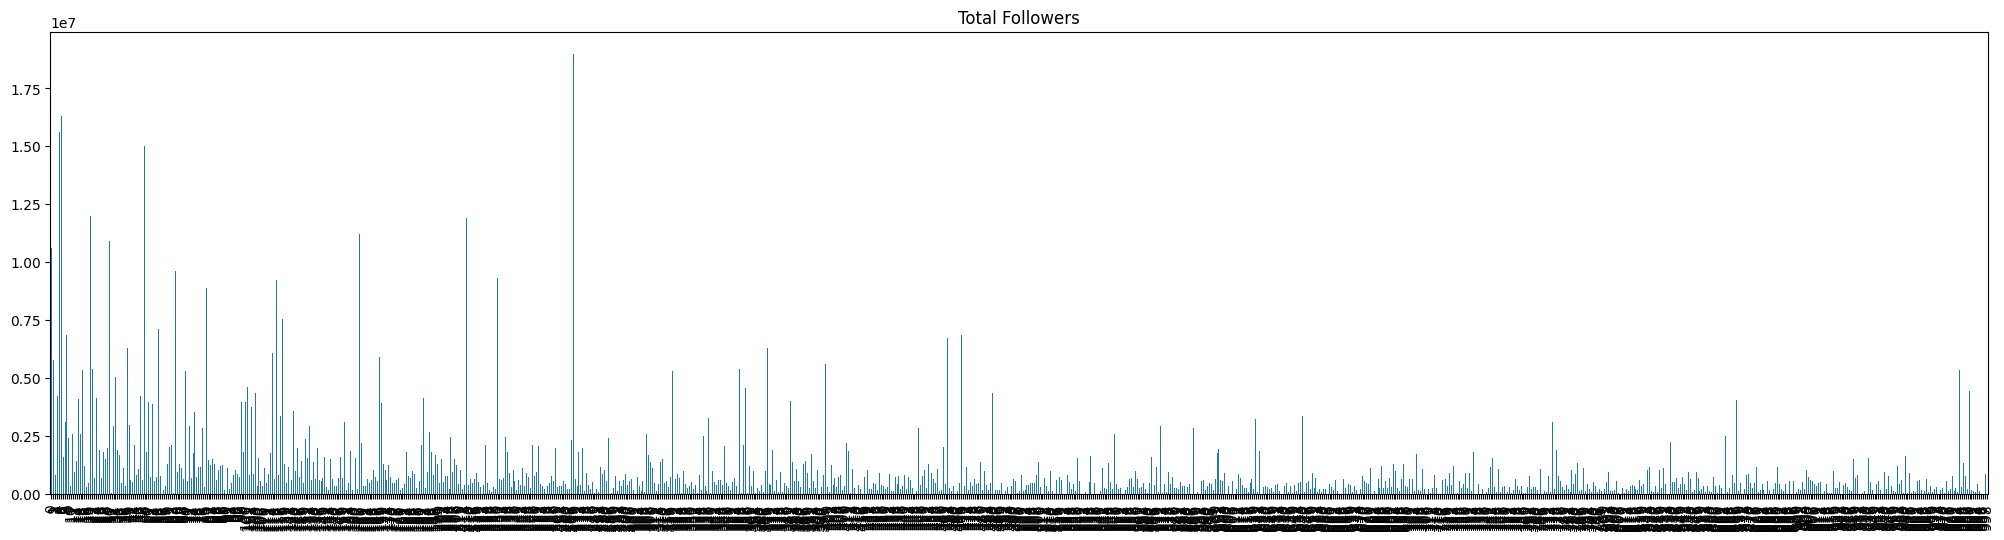

In [ ]:
plt.figure(figsize=(25,6))
n_df["TOTAL_FOLLOWERS"].plot.bar().set_title("Total Followers");

In [ ]:
n_df.ACTIVE_DAYS_PER_WEEK.unique()

array([3.6, 5.6, 2.8, 6.2, 4.3, 5. , 3.7, 4.7, 5.2, 6.3, 4.5, 6.6, 3.8,
       0.7, 2. , 0.8, 5.3, 4.1, 7. , 4.2, 3.9, 1.4, 5.4, 1. , 2.5, 1.7,
       3.2, 1.3, 2.3, 0.5, 6.7, 6.1, 5.1, 3.1, 4.9, 2.2, 2.7, 6.5, 4.8,
       1.5, 0.9, 0.6, 0.2, 0. , 6.8, 1.9, 1.2, 2.9, 3. , 5.9, 4.4, 5.8,
       3.5, 1.6, 5.5, 5.7, 2.4, 2.6, 1.8, 3.4, 4.6, 4. , 6.4, 2.1, 1.1,
       6. , 0.3, 0.4, 3.3, 6.9, 0.1])

In [ ]:
n_df["ACTIVE_DAYS_PER_WEEK"].describe()

count    999.000000
mean       3.591391
std        1.797796
min        0.000000
25%        2.200000
50%        3.800000
75%        5.100000
max        7.000000
Name: ACTIVE_DAYS_PER_WEEK, dtype: float64

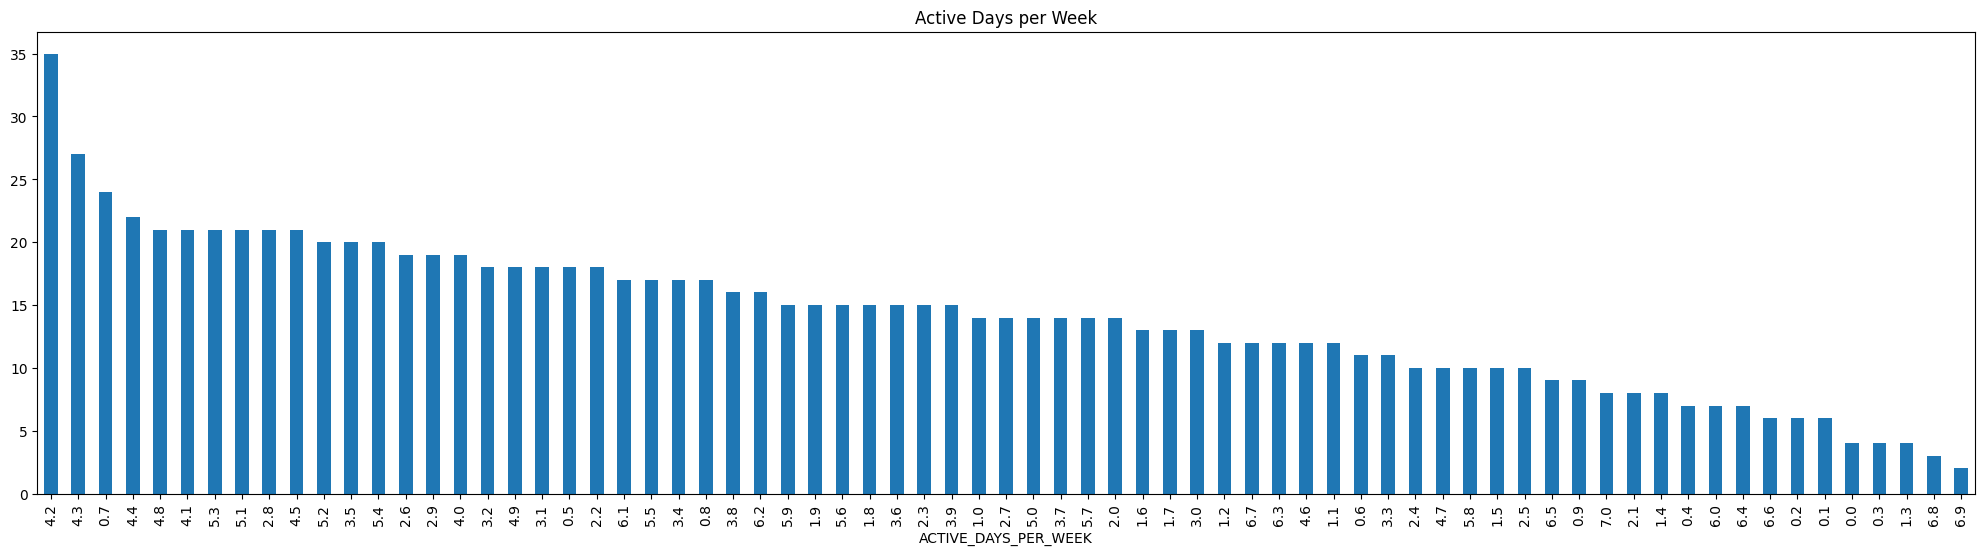

In [ ]:
plt.figure(figsize=(25,6))
n_df["ACTIVE_DAYS_PER_WEEK"].value_counts().plot.bar().set_title("Active Days per Week");

These shows us most of the streamers stream around 4 days a week

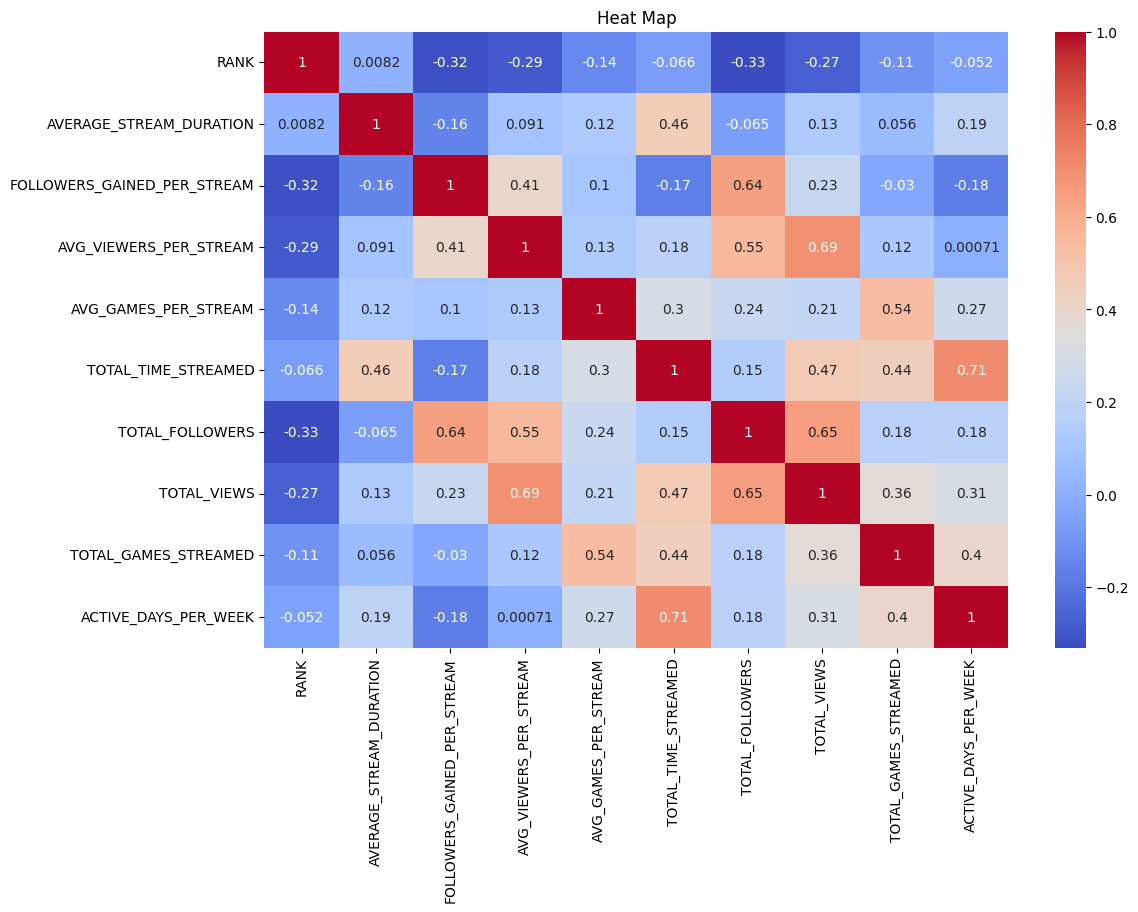

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
preprocessing.scale(df[num_cols])
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Heat Map')
plt.show()

**Heat Map above shows us the relation between rank and other variables. We can see that 'AVERAGE_STREAM_DURATION' has positive coralation and others has negative**

Mean Squared Error: 77184.09364749999
R² Score: 0.03685592360540724


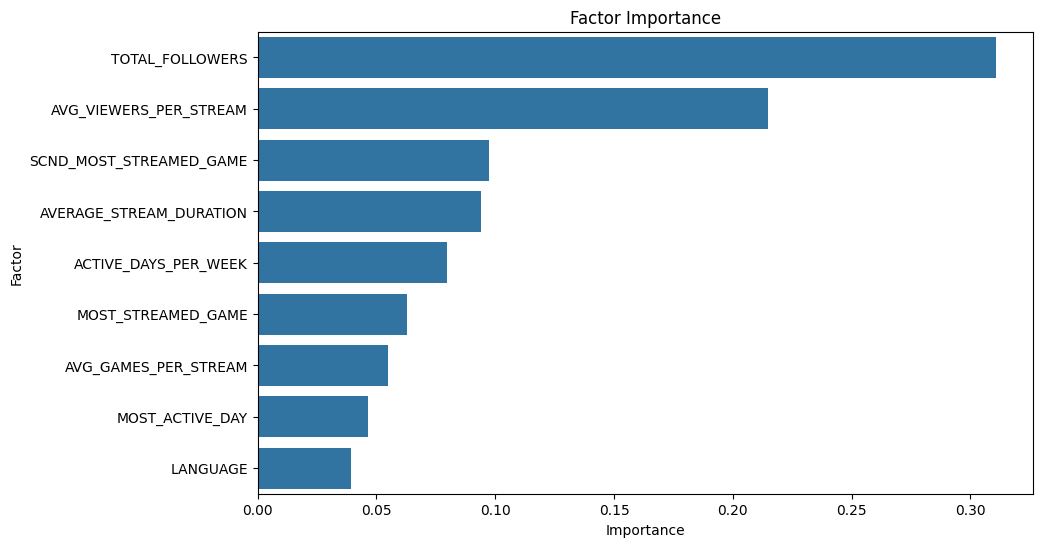

In [ ]:
df = dataset.copy()

label_encoder = LabelEncoder()

# Applying label encoding to non numerical columns so we can use them
for column in ['MOST_ACTIVE_DAY', 'LANGUAGE', 'MOST_STREAMED_GAME', 'SCND_MOST_STREAMED_GAME']:
    df[column] = label_encoder.fit_transform(df[column])

X = df[['TOTAL_FOLLOWERS', 'AVG_VIEWERS_PER_STREAM', 'ACTIVE_DAYS_PER_WEEK', 'AVG_GAMES_PER_STREAM', 'AVERAGE_STREAM_DURATION', 'MOST_ACTIVE_DAY', 'MOST_STREAMED_GAME', 'SCND_MOST_STREAMED_GAME', 'LANGUAGE']]
y = df['RANK']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using RandomForestRegressor to train
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Using predict function to test
y_pred = model.predict(X_test)

# Finding error and r2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Creating a new dataframe which stores importances of values on rank
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Factor': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Creating plot for showing importance of variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Factor', data=importance_df)
plt.title('Factor Importance')
plt.show()

**The graph above shows which factor affects rank more and which affects less. This will help users prioritize their goals to earn more**

**We can also see an unexpected result which is the affect of second most streamed game on rank is higher than most streamed game**

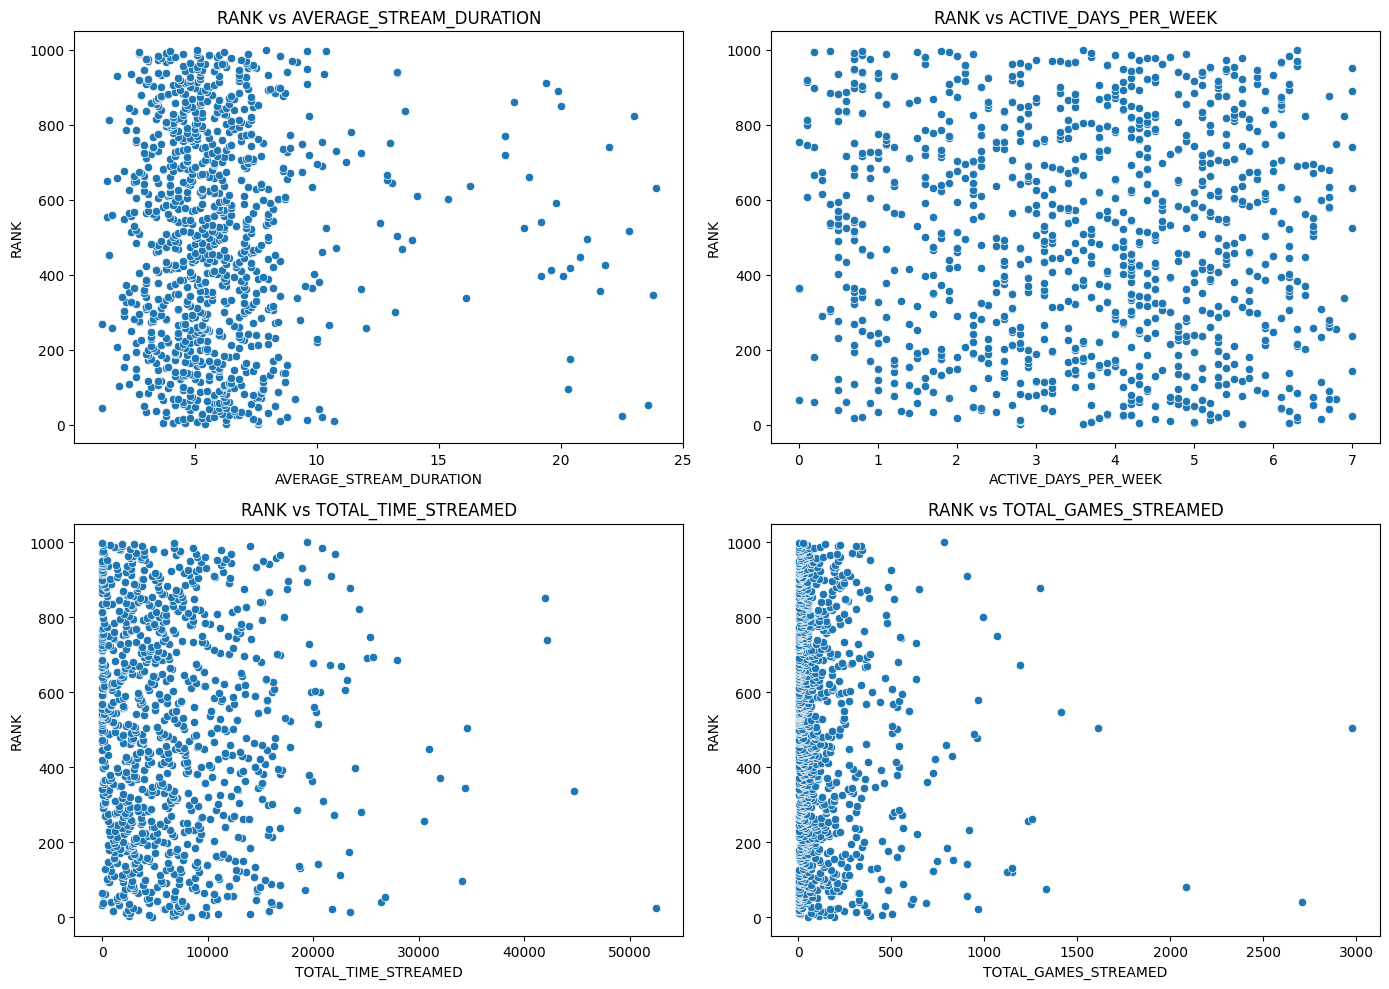

In [ ]:
df=dataset.copy()
num_df = df.select_dtypes(include=[float, int])
corr_matrix = num_df.corr()
correlated_vars = corr_matrix['RANK'].sort_values(ascending=False).index[1:5]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, var in enumerate(correlated_vars):
    row, col = divmod(i, 2)
    sns.scatterplot(ax=axes[row, col], data=df, x=var, y='RANK')
    axes[row, col].set_title(f'RANK vs {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('RANK')

plt.tight_layout()
plt.show()

**We can see from these graphs:**

**Most optimal stream duration is around 4 and 6 hours**

**Active days per week doesn't directly affect your rank this is because a lot of the top 1000 stream as their jobs so they stream very frequently**

**Streaming a lot doesn't always mean you will be higher on the list this is because of the same reason as above**

**If you stick to one game you will be higher on the board**

In [ ]:
df = pd.read_csv("dataset.csv")
#avg_viewers, avg_followers_gained, and total_time_streamed have 3 digit seperators that need to be removed they should be integers
cols = ['AVG_VIEWERS_PER_STREAM', 'FOLLOWERS_GAINED_PER_STREAM', 'TOTAL_TIME_STREAMED']

for col in cols:
    for i in range(len(df[col])):
        # if there is three zeros after the decimal point remove them, if they are not zero remove the decimal point
        if df[col][i] % 1 == 0:
            df.loc[i, col] = int(df[col][i])
        else:
            df.loc[i, col] = int(df[col][i] * 1000)
    df[col] = df[col].astype('int64')


df_num = df.select_dtypes(include=["int64","float64"])

In [ ]:
df_num.head(10)

,RANK,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK
0,1,7.6,18405,15852,2.3,4698,10600000,9150000,194,3.6
1,2,5.4,3386,1145,1.2,8407,5760000,1950000,54,5.6
2,3,6.3,689,12331,1.3,6728,797000,14200000,111,2.8
3,4,4.6,7185,0,3.6,2554,4220000,53,385,6.2
4,5,4.1,8289,190714,1.5,6865,15600000,359000000,149,4.3
5,6,3.7,13260,213849,1.8,4482,16300000,263000000,169,5.0
6,7,5.1,667,70813,1.6,9845,1570000,156000000,448,5.0
7,8,7.6,2013,60430,1.3,10995,3110000,93300000,78,3.7
8,9,8.5,3434,346968,1.0,9459,6860000,1339000,8,2.8
9,10,7.6,1273,48758,2.8,13979,2410000,92800000,503,4.7


array([[<Axes: title={'center': 'AVERAGE_STREAM_DURATION'}>,
        <Axes: title={'center': 'FOLLOWERS_GAINED_PER_STREAM'}>,
        <Axes: title={'center': 'AVG_VIEWERS_PER_STREAM'}>],
       [<Axes: title={'center': 'AVG_GAMES_PER_STREAM'}>,
        <Axes: title={'center': 'TOTAL_TIME_STREAMED'}>,
        <Axes: title={'center': 'TOTAL_FOLLOWERS'}>],
       [<Axes: title={'center': 'TOTAL_VIEWS'}>,
        <Axes: title={'center': 'TOTAL_GAMES_STREAMED'}>,
        <Axes: title={'center': 'ACTIVE_DAYS_PER_WEEK'}>]], dtype=object)

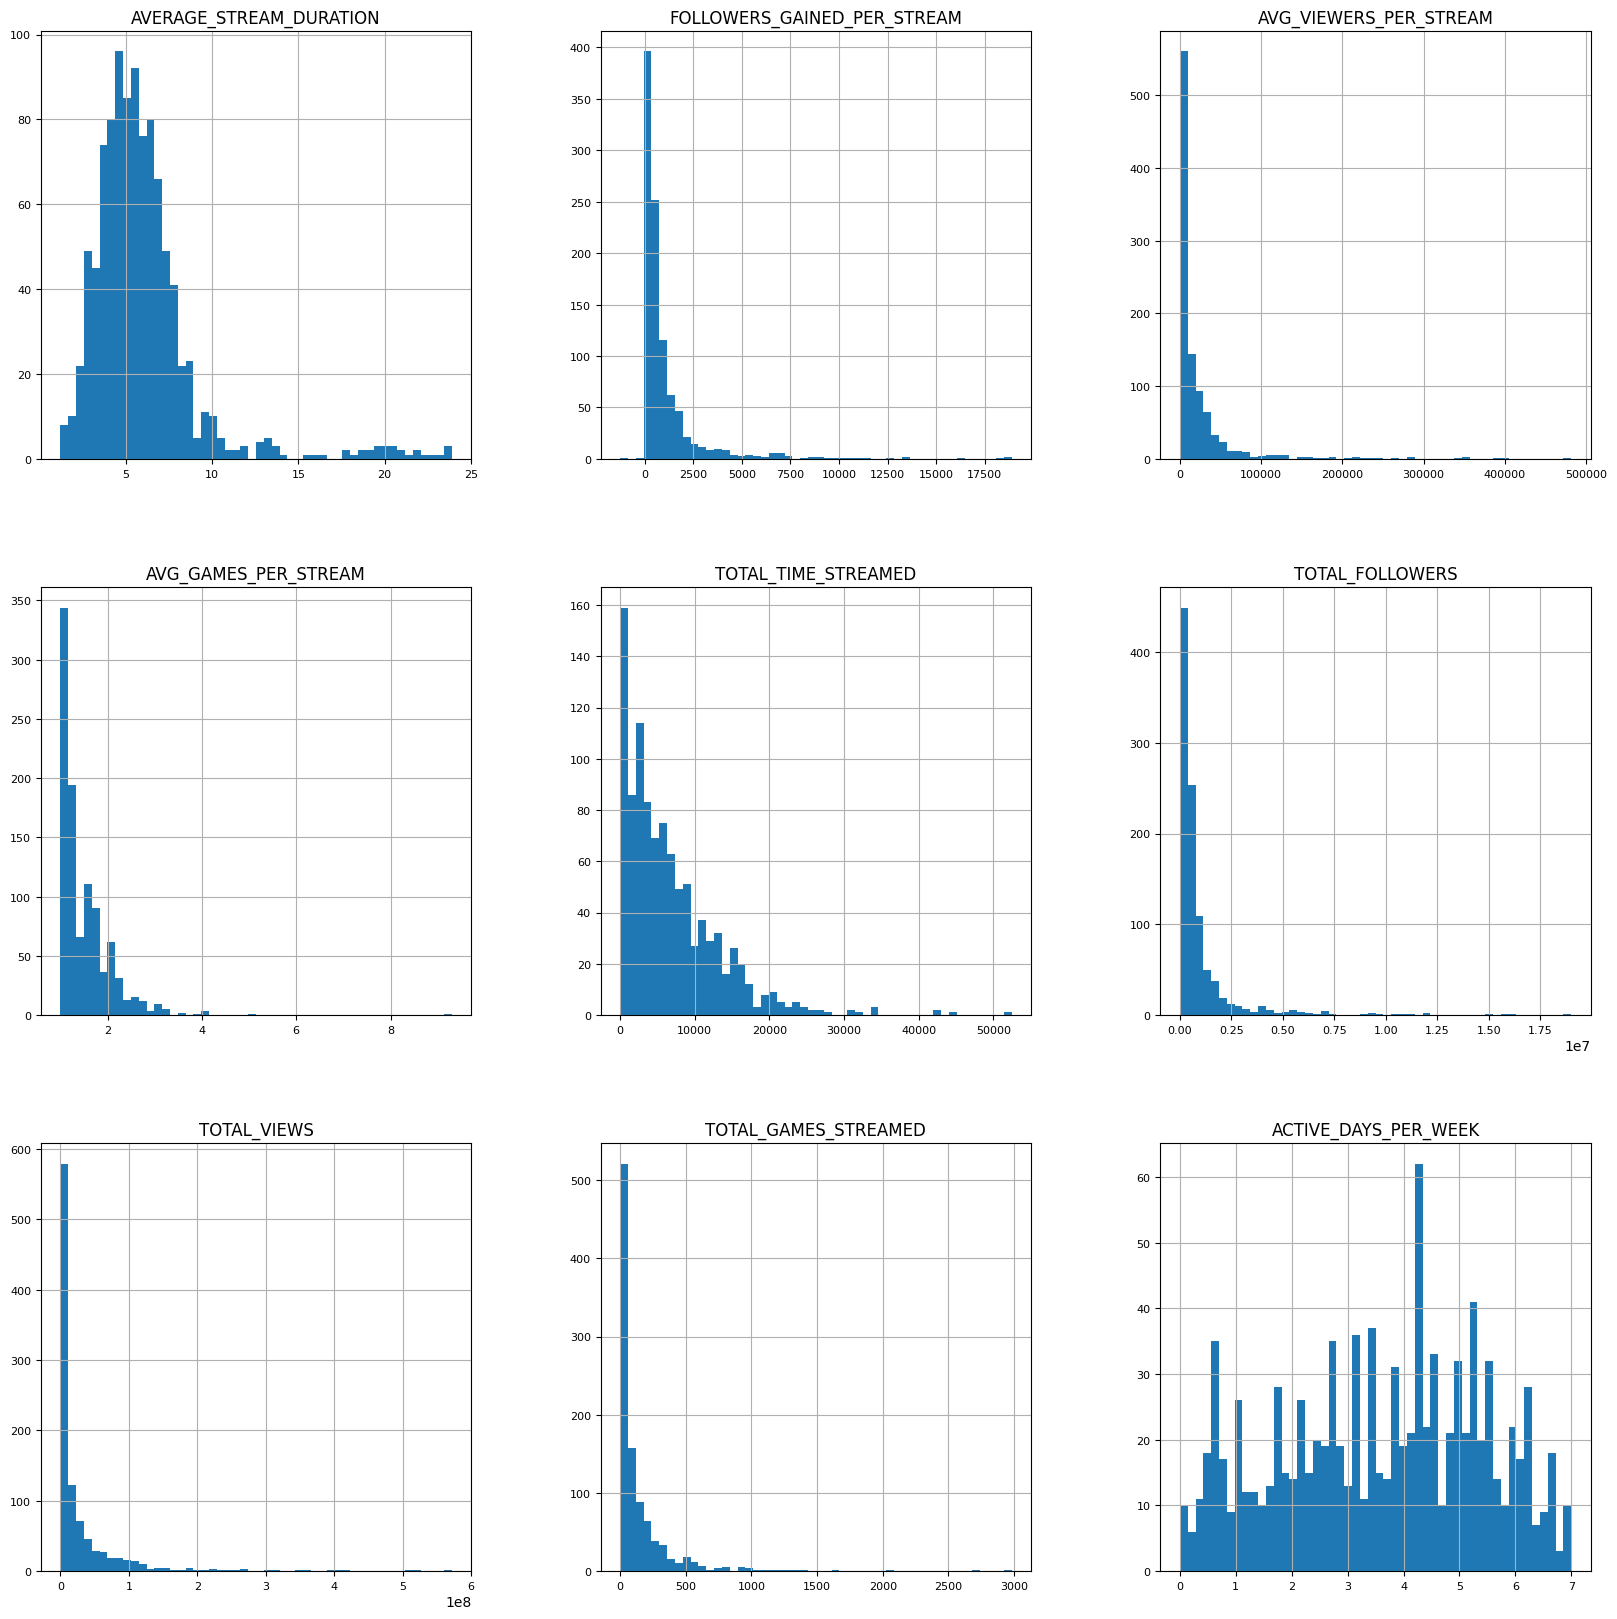

In [ ]:
r_num = df_num.copy()
#Histograms of all numerical columns except for the rank column
r_num.drop('RANK', axis=1).hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
df_num

,RANK,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK
0,1,7.6,18405,15852,2.3,4698,10600000,9150000,194,3.6
1,2,5.4,3386,1145,1.2,8407,5760000,1950000,54,5.6
2,3,6.3,689,12331,1.3,6728,797000,14200000,111,2.8
3,4,4.6,7185,0,3.6,2554,4220000,53,385,6.2
4,5,4.1,8289,190714,1.5,6865,15600000,359000000,149,4.3
...,...,...,...,...,...,...,...,...,...,...
994,996,4.0,248,1423,1.3,1873,133000,766000,31,1.8
995,997,10.4,874,0,1.0,21,1300,0,1,0.8
996,998,9.6,216,0,1.0,19,1300,0,2,0.4
997,999,5.1,605,16190,1.1,6827,837000,22400000,24,3.6


In [ ]:
df_num["FOLLOWERS_GAINED_PER_STREAM"].describe()

count      999.000000
mean      1086.592593
std       2003.239936
min      -1277.000000
25%        195.500000
50%        452.000000
75%       1031.000000
max      18889.000000
Name: FOLLOWERS_GAINED_PER_STREAM, dtype: float64

In [ ]:
print("Count: ", str(df_num["FOLLOWERS_GAINED_PER_STREAM"].count()))
print("Mean: ", str(df_num["FOLLOWERS_GAINED_PER_STREAM"].mean()))
print("Median: ", str(df_num["FOLLOWERS_GAINED_PER_STREAM"].median()))
print("Maximum: ", str(df_num["FOLLOWERS_GAINED_PER_STREAM"].max()))
print("Minimum: ", str(df_num["FOLLOWERS_GAINED_PER_STREAM"].min()))
print("Standard Deviation: ", str(df_num["FOLLOWERS_GAINED_PER_STREAM"].std()))

Count:  999
Mean:  1086.5925925925926
Median:  452.0
Maximum:  18889
Minimum:  -1277
Standard Deviation:  2003.2399361206142


In [ ]:
from pandas.api.types import CategoricalDtype

In [ ]:
df.MOST_STREAMED_GAME = df.MOST_STREAMED_GAME.astype(CategoricalDtype(ordered=True))

In [ ]:
df.dtypes

RANK                                 int64
NAME                                object
LANGUAGE                            object
TYPE                                object
MOST_STREAMED_GAME                category
SCND_MOST_STREAMED_GAME             object
AVERAGE_STREAM_DURATION            float64
FOLLOWERS_GAINED_PER_STREAM          int64
AVG_VIEWERS_PER_STREAM               int64
AVG_GAMES_PER_STREAM               float64
TOTAL_TIME_STREAMED                  int64
TOTAL_FOLLOWERS                      int64
TOTAL_VIEWS                          int64
TOTAL_GAMES_STREAMED                 int64
ACTIVE_DAYS_PER_WEEK               float64
MOST_ACTIVE_DAY                     object
DAY_WITH_MOST_FOLLOWERS_GAINED      object
dtype: object

In [ ]:
df.MOST_STREAMED_GAME.value_counts()

MOST_STREAMED_GAME
Just Chatting               257
League of Legends            84
Grand Theft Auto V           74
VALORANT                     60
Casino                       36
                           ... 
Pokemon Pinball               1
Resident Evil 3: Nemesis      1
RimWorld                      1
RuneScape                     1
iRacing                       1
Name: count, Length: 105, dtype: int64

**Majority of the top 1000 are streaming Just Chatting which is not playing a game and just talking to your viewers. This means you will have the most viewers when they are the center of your attention**

In [ ]:
df.MOST_STREAMED_GAME.head(10) # default: ordered by value_counts

0                     Just Chatting
1    Tom Clancy's Rainbow Six Siege
2                 League of Legends
3                          NBA 2K23
4                     Just Chatting
5                         Minecraft
6                 World of Warcraft
7                          VALORANT
8                 League of Legends
9                     Just Chatting
Name: MOST_STREAMED_GAME, dtype: category
Categories (105, object): ['ASMR' < 'Albion Online' < 'Among Us' < 'Animals Aquariums and Zoos' ... 'World of Warcraft' < 'World of Warships' < 'Yu-Gi-Oh! Duel Links' < 'iRacing']

In [ ]:
type_categorical = ['personality', 'esports']
df_type = df.TYPE.astype(CategoricalDtype(ordered=True, categories= type_categorical))

In [ ]:
df_type.head(10)

0    personality
1    personality
2    personality
3    personality
4    personality
5    personality
6    personality
7    personality
8        esports
9    personality
Name: TYPE, dtype: category
Categories (2, object): ['personality' < 'esports']

In [ ]:
df_type.value_counts()

TYPE
personality    942
esports         57
Name: count, dtype: int64

**Both top 10 and the vast majority of the top 1000 streamers are streaming personal content and are not esport players or commercial esports accounts.**

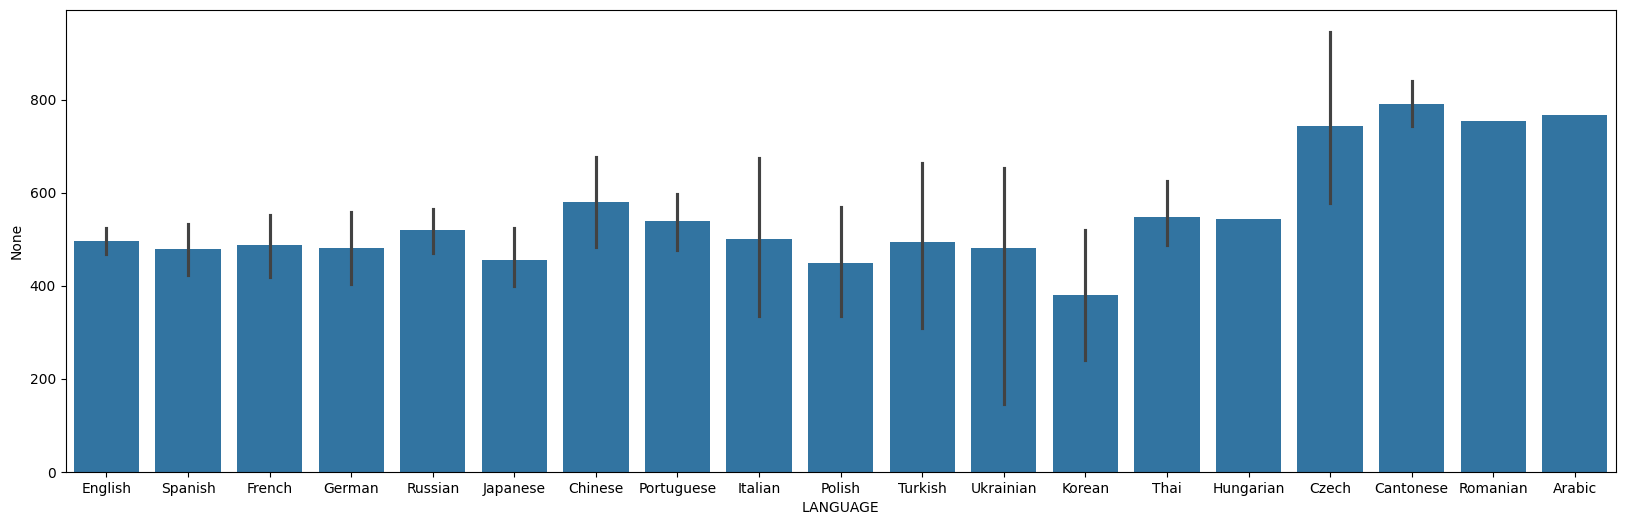

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x="LANGUAGE", y=df.LANGUAGE.index, data=df);

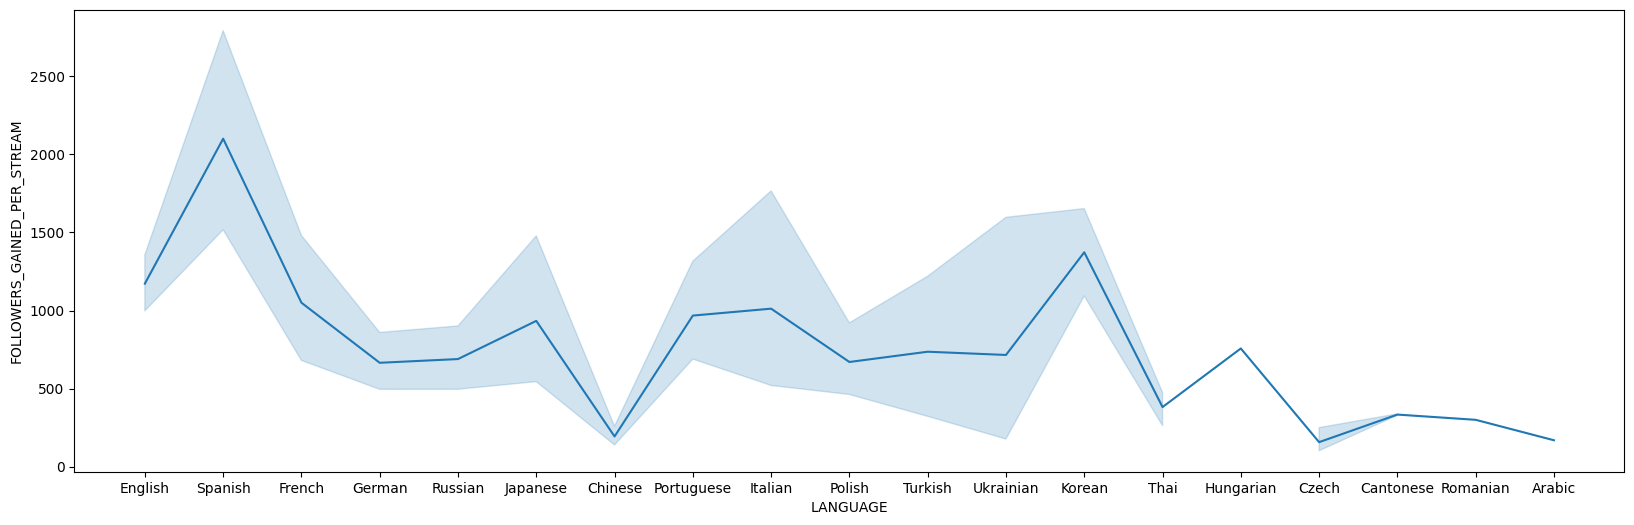

In [ ]:
plt.figure(figsize=(20, 6))
df.tail(458)
sns.lineplot(x="LANGUAGE", y="FOLLOWERS_GAINED_PER_STREAM", data=df);

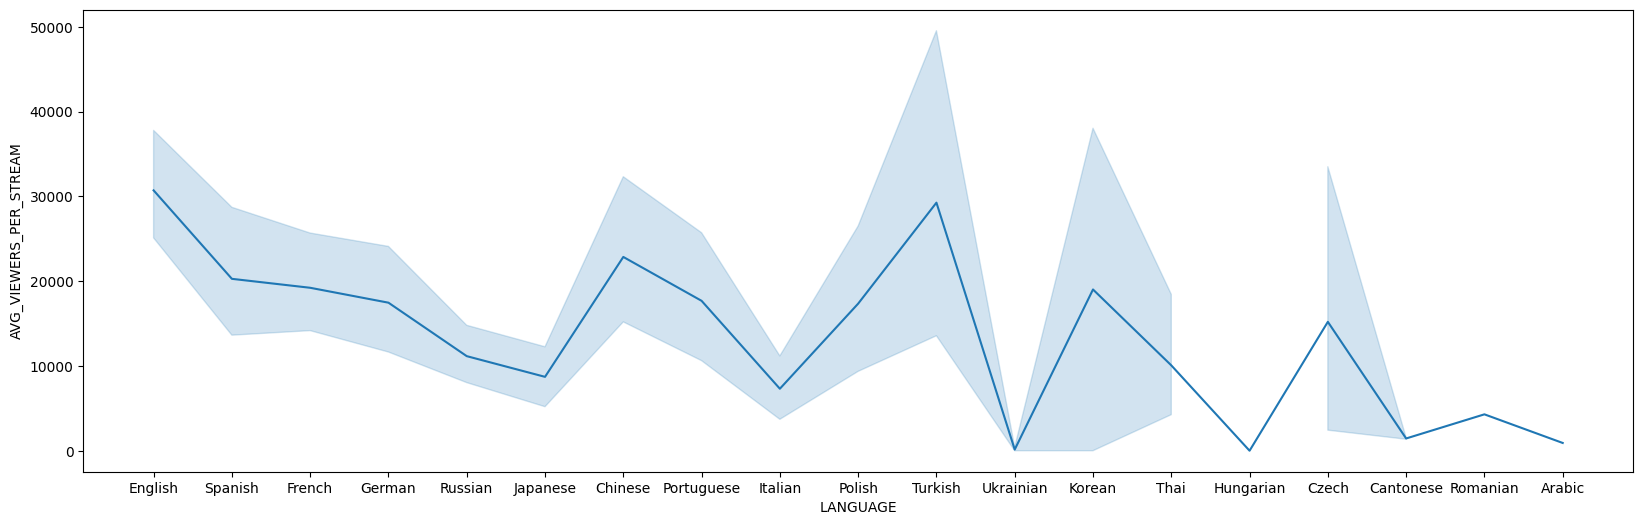

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(x="LANGUAGE", y="AVG_VIEWERS_PER_STREAM", data=df);

In [ ]:
df["LANGUAGE"].value_counts()

LANGUAGE
English       401
Russian       115
Spanish       106
Portuguese     82
Japanese       79
French         72
German         60
Chinese        28
Polish         18
Italian        13
Turkish         7
Thai            5
Ukrainian       3
Czech           3
Korean          2
Cantonese       2
Hungarian       1
Romanian        1
Arabic          1
Name: count, dtype: int64

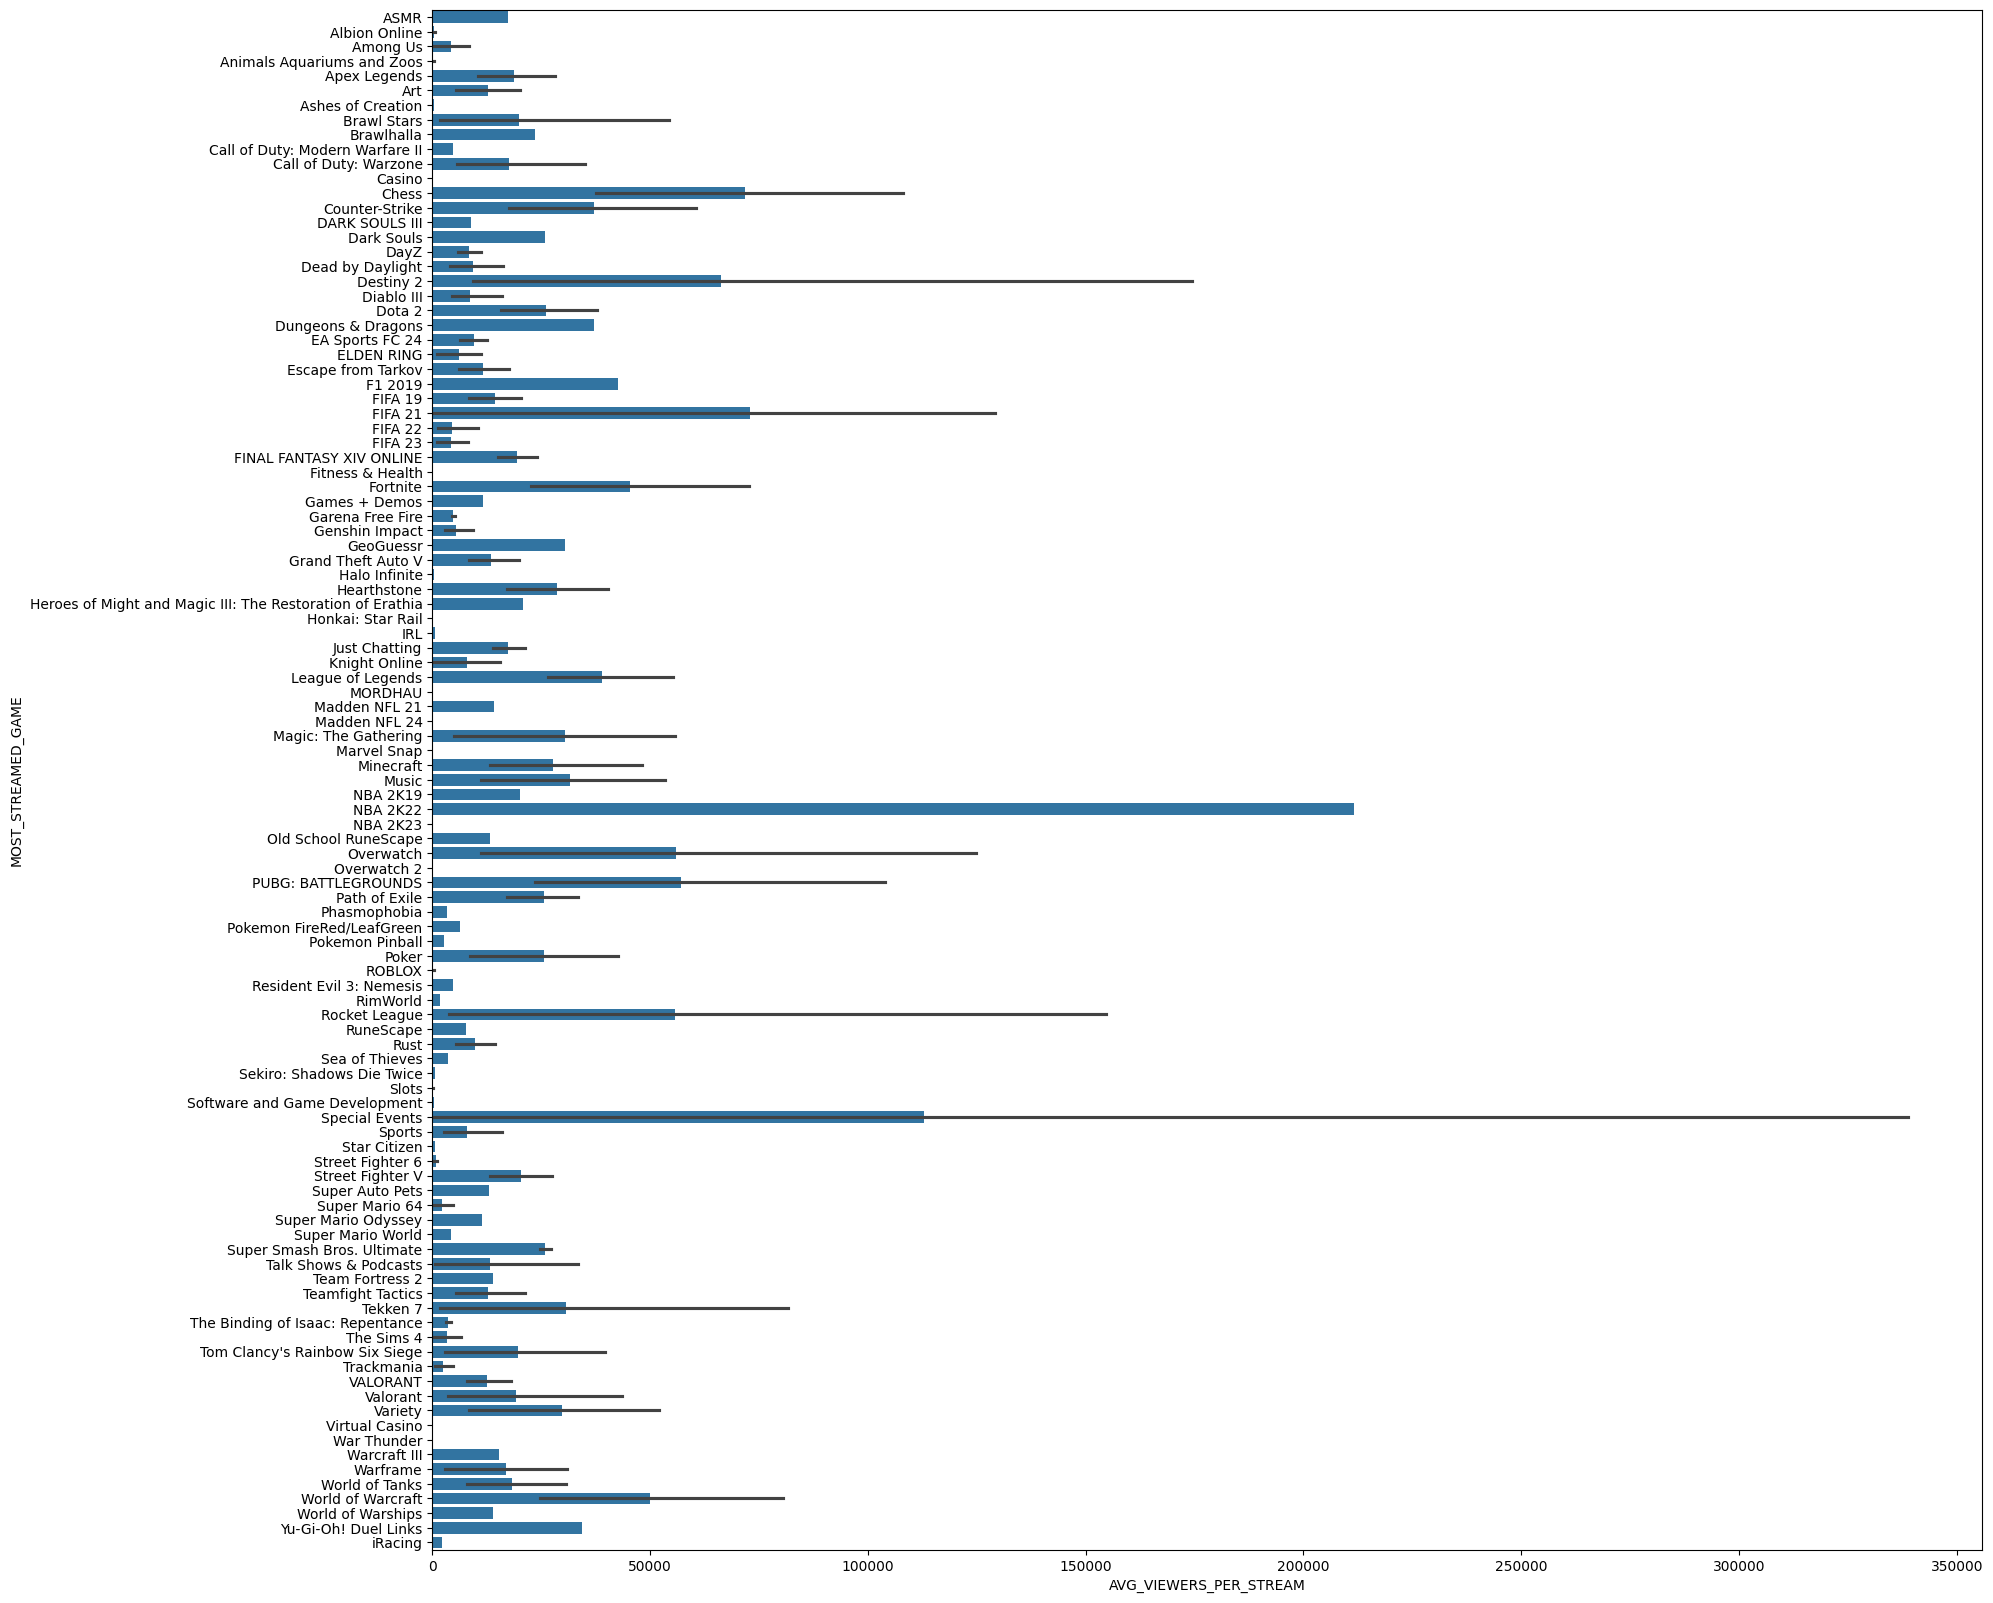

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(x="AVG_VIEWERS_PER_STREAM", y="MOST_STREAMED_GAME", data=df);

**Streaming during special events has the largest standard deviation. Some games' special events attract the most viewers and some not that much, but when there isn't any special events, your viewer count will be zero.**